# kMeans

In [171]:
import numpy as np
import matplotlib.pyplot as plt


# gernerate some blobs
def gen_blobs(num_points = 100,spread = .5,dim = 2):
    X = np.random.rand(num_points,dim)
    X[X>np.mean(X)] += np.std(X) * spread
    return X

def place_initial_centroids(X, num_centroids = 4, centroid_spread = .1):
    # where should these start --> probably normally dist. around the mean of the dataset
    centroids = np.random.randn(num_centroids, len(X[0]))*centroid_spread+np.mean(X, axis=0)
    return centroids

def find_new_centroids(X, centroids):
    distance_matrix = np.array([[np.sqrt(np.dot(abs(x-c),abs(x-c))) for x in X]for c in centroids])
    affilliation = np.argmin(distance_matrix, axis=0)
    new_centroids = np.array([np.mean(X[affilliation==i],axis=0) for i in range(len(centroids))])
    
    return affilliation, new_centroids


def kMeans(X, num_clusters = 3, maxfev = 100):
    
    centroids = place_initial_centroids(X, num_clusters)
    old_affilliation = np.zeros(len(X))
    i =1
    while i < maxfev:
        affilliation, centroids = find_new_centroids(X, centroids)
        if np.array(affilliation-old_affilliation).any() == 0:
            print('Done @ {}'.format(i))
            i = maxfev
        else:
            old_affilliation = affilliation
            i += 1
    return affilliation

Done @ 6


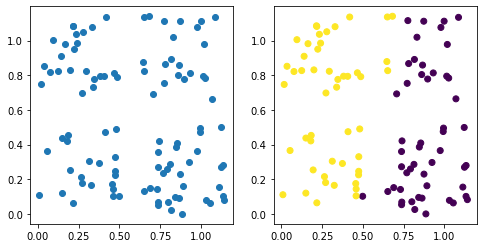

In [182]:
X = gen_blobs(100)
fig, ax = plt.subplots(1,2, figsize=(8,4))
ax[0].scatter(X[:,0],X[:,1])
affilliation = kMeans(X, num_clusters=2)
ax[1].scatter(X[:,0],X[:,1], c=affilliation)
plt.show()

In [193]:
import seaborn as sns
iris = sns.load_dataset('iris')
X = iris.values[:,:4]
y = iris.values[:,-1]

In [194]:
kMeans(X)

Done @ 6


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

Done @ 12


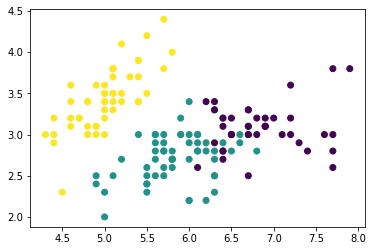

In [195]:
plt.scatter(X[:,0],X[:,1], c=kMeans(X))